In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

In [46]:
#https://archive.ics.uci.edu/ml/datasets/credit+approval
df = pd.read_csv('crx.data', header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [47]:
df.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [48]:
df.shape

(690, 16)

In [49]:
names = []
for i in range(df.shape[1]):
    if i<df.shape[1]-1:
        names.append("var"+str(i))
    else:
        names.append("Alvo")

df.columns = names

In [50]:
df['var0'].replace("?", inplace=True , method='ffill')

In [51]:
 df.tail(20)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,Alvo
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,a,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [52]:
print(df.isnull().sum())
print(df.isna().sum())

var0     0
var1     0
var2     0
var3     0
var4     0
var5     0
var6     0
var7     0
var8     0
var9     0
var10    0
var11    0
var12    0
var13    0
var14    0
Alvo     0
dtype: int64
var0     0
var1     0
var2     0
var3     0
var4     0
var5     0
var6     0
var7     0
var8     0
var9     0
var10    0
var11    0
var12    0
var13    0
var14    0
Alvo     0
dtype: int64


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    690 non-null    object 
 1   var1    690 non-null    object 
 2   var2    690 non-null    float64
 3   var3    690 non-null    object 
 4   var4    690 non-null    object 
 5   var5    690 non-null    object 
 6   var6    690 non-null    object 
 7   var7    690 non-null    float64
 8   var8    690 non-null    object 
 9   var9    690 non-null    object 
 10  var10   690 non-null    int64  
 11  var11   690 non-null    object 
 12  var12   690 non-null    object 
 13  var13   690 non-null    object 
 14  var14   690 non-null    int64  
 15  Alvo    690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [54]:
from sklearn import preprocessing


for i in df.columns:
     if df[i].dtypes == 'O' and i != "var13":
            lencod = preprocessing.LabelEncoder()
            lencod.fit(df[i])
            df[i] = lencod.transform(df[i])

#var13 é um 'object', porem numerico, como todos possuem a mesma quantidade de digitos acredito ser alguma informação qualitativa
#então exclui ela do preprocessamento.

In [57]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,Alvo
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,00202,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,00043,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,00280,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,00100,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,00120,0,0


In [58]:
df.tail()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,Alvo
685,1,52,10.085,3,3,5,4,1.25,0,0,0,0,0,00260,0,1
686,0,71,0.750,2,1,2,8,2.00,0,1,2,1,0,00200,394,1
687,0,97,13.500,3,3,6,3,2.00,0,1,1,1,0,00200,1,1
688,1,20,0.205,2,1,1,8,0.04,0,0,0,0,0,00280,750,1
689,1,197,3.375,2,1,2,4,8.29,0,0,0,1,0,00000,0,1


In [59]:
df.dtypes

var0       int32
var1       int32
var2     float64
var3       int32
var4       int32
var5       int32
var6       int32
var7     float64
var8       int32
var9       int32
var10      int64
var11      int32
var12      int32
var13     object
var14      int64
Alvo       int32
dtype: object

array([[<AxesSubplot:title={'center':'var0'}>,
        <AxesSubplot:title={'center':'var1'}>,
        <AxesSubplot:title={'center':'var2'}>,
        <AxesSubplot:title={'center':'var3'}>],
       [<AxesSubplot:title={'center':'var4'}>,
        <AxesSubplot:title={'center':'var5'}>,
        <AxesSubplot:title={'center':'var6'}>,
        <AxesSubplot:title={'center':'var7'}>],
       [<AxesSubplot:title={'center':'var8'}>,
        <AxesSubplot:title={'center':'var9'}>,
        <AxesSubplot:title={'center':'var10'}>,
        <AxesSubplot:title={'center':'var11'}>],
       [<AxesSubplot:title={'center':'var12'}>,
        <AxesSubplot:title={'center':'var14'}>,
        <AxesSubplot:title={'center':'Alvo'}>, <AxesSubplot:>]],
      dtype=object)

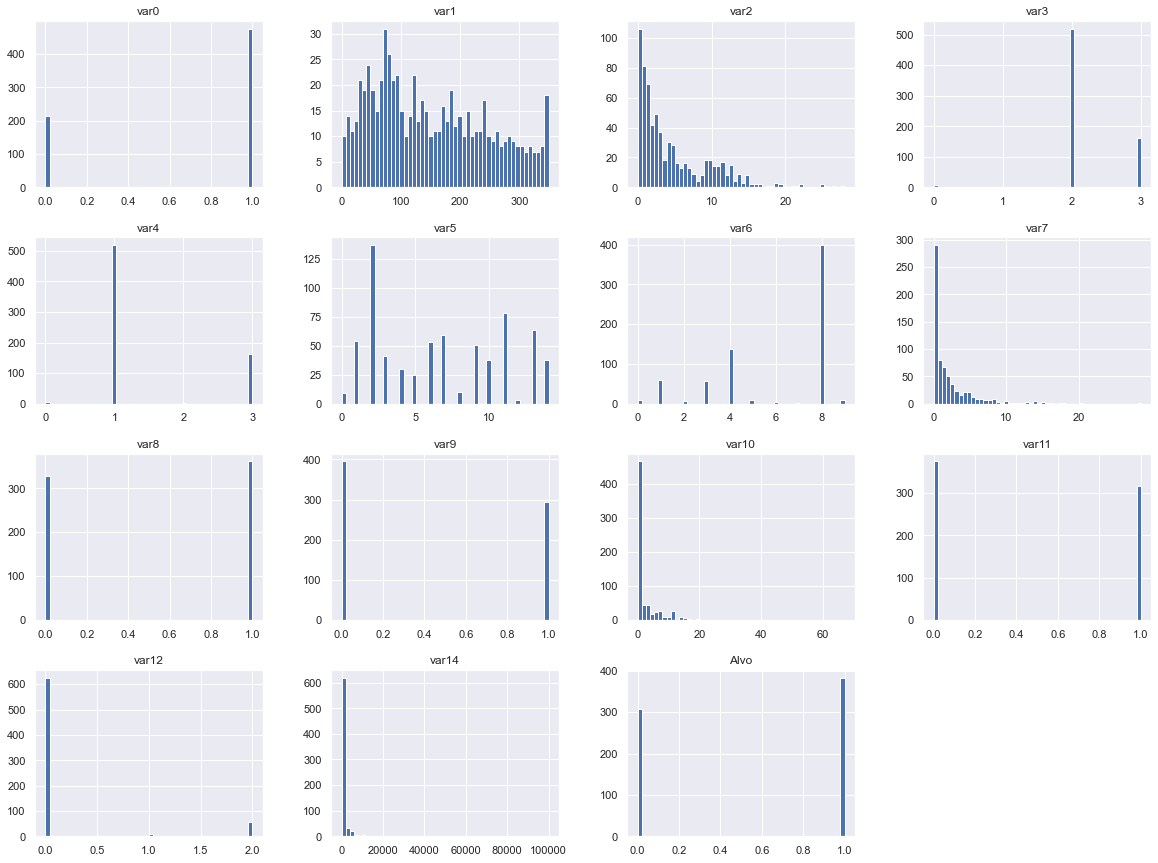

In [60]:
df.hist(figsize=(20,15),
        bins = 50)

array([[<AxesSubplot:title={'center':'var1'}>,
        <AxesSubplot:title={'center':'var14'}>],
       [<AxesSubplot:title={'center':'var2'}>,
        <AxesSubplot:title={'center':'Alvo'}>]], dtype=object)

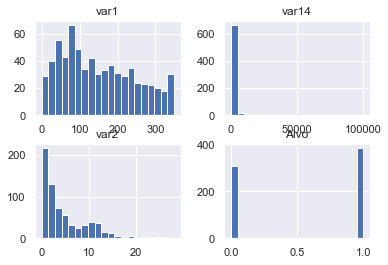

In [71]:
df[['var1','var14','var2','Alvo']].hist(bins=20)

In [72]:
df[['var1','var14','var2','Alvo']].describe()

,var1,var14,var2,Alvo
count,690.000000,690.000000,690.000000,690.000000
mean,150.528986,1017.385507,4.758725,0.555072
std,96.188946,5210.102598,4.978163,0.497318
min,0.000000,0.000000,0.000000,0.000000
25%,71.000000,0.000000,1.000000,0.000000
50%,133.500000,5.000000,2.750000,1.000000
75%,226.000000,395.500000,7.207500,1.000000
max,349.000000,100000.000000,28.000000,1.000000


In [128]:
cate_var1 = list(range(df['var1'].min(),df['var1'].max()+100,50)) #range de categorias

cater_var1_name = [f'cate1_cat{i}' for i in range(len(cate_var1)-1)] #nome das categorias

df['var1_cat'] = pd.cut(df.var1,cate_var1,labels=cater_var1_name,include_lowest=True)

In [129]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,Alvo,var1_cat
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,00202,0,0,cate1_cat3
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,00043,560,0,cate1_cat6
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,00280,824,0,cate1_cat1
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,00100,3,0,cate1_cat2
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,00120,0,0,cate1_cat0


In [130]:
v1_crst  = pd.crosstab(df['Alvo'],columns=df['var1_cat'])
v1_crst.index = ['-','+']
v1_crst

var1_cat,cate1_cat0,cate1_cat1,cate1_cat2,cate1_cat3,cate1_cat4,cate1_cat5,cate1_cat6
-,43,64,45,39,42,40,34
+,76,89,62,58,43,26,29


In [112]:
df[['var3','']]